### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_dataset.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Dataset

#### 1. Reading Data

In [12]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_dataset.csv', parse_dates = ['Date'])
df1.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-01-03,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
1,2009-01-05,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-07,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-09,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
4,2009-01-11,0.0,7600.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0


In [13]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [15]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1584 entries, 2009-01-03 to 2017-09-04
Data columns (total 23 columns):
btc_market_price                                       1584 non-null float64
btc_total_bitcoins                                     1584 non-null float64
btc_market_cap                                         1584 non-null float64
btc_trade_volume                                       1106 non-null float64
btc_blocks_size                                        1584 non-null float64
btc_avg_block_size                                     1584 non-null float64
btc_n_orphaned_blocks                                  1584 non-null float64
btc_n_transactions_per_block                           1584 non-null float64
btc_median_confirmation_time                           1584 non-null float64
btc_hash_rate                                          1584 non-null float64
btc_difficulty                                         1584 non-null float64
btc_miners_revenue          

- The data frame has 1584 entries and 23 columns. 
- btc_trade_volume only has 1106 data, so
- All data in float64.

In [16]:
# Show null data in dataframe
df1[df1.btc_trade_volume.isnull()].head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-20,17.3500,6605900.0,1.146124e+08,NaN,148.0,0.020049,0.0,63.0,0.000000,10.113725,...,1.388642,17.877669,23113.0,11278.0,804159.0,11278.0,8032.0,5.015070e+06,836861.0,14519535.0
2011-06-22,15.0500,6630950.0,9.979580e+07,NaN,155.0,0.016320,0.0,71.0,0.000000,11.770284,...,11.033649,17.225305,24881.0,11810.0,825121.0,11810.0,7789.0,3.232504e+06,122507.0,1843731.0
2011-06-24,16.7501,6654850.0,1.114694e+08,NaN,163.0,0.017697,0.0,57.0,0.000000,16.454405,...,11.319272,18.075485,22763.0,11134.0,846767.0,11134.0,7349.0,4.528661e+06,106146.0,1777963.0
2013-09-17,127.5600,11713200.0,1.494136e+09,NaN,10414.0,0.174924,0.0,255.0,7.300000,990.986807,...,3.273634,8.687958,61057.0,66291.0,23955832.0,42021.0,25426.0,6.727934e+05,137920.0,17593089.0
2013-09-19,124.1000,11721850.0,1.454682e+09,NaN,10468.0,0.133412,0.0,316.0,6.116667,1091.765127,...,2.267940,10.486791,66398.0,59004.0,24079219.0,41152.0,27719.0,7.850827e+05,219847.0,27283020.0


#### 2. Cleaning Data (Deal with Missing Data)

Problem :
- There are missing data 

Solution:
- Using Fillna or interpolation Method

In [19]:
#new_df is the data with non NaN value
new_df = df1[np.isfinite(df1['btc_trade_volume'])]
new_df.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,4.971027e-08,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
2009-01-05,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,50.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2009-01-09,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,6.959438e-07,...,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
2009-01-11,0.0,7600.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,5.269289e-06,...,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0


In [25]:
# Lets see the correlation between each column
correlation = new_df.corr(method="pearson")
correlation['btc_trade_volume']

btc_market_price                                       0.730447
btc_total_bitcoins                                     0.436083
btc_market_cap                                         0.722286
btc_trade_volume                                       1.000000
btc_blocks_size                                        0.434343
btc_avg_block_size                                     0.446077
btc_n_orphaned_blocks                                  0.206849
btc_n_transactions_per_block                           0.442291
btc_median_confirmation_time                           0.210305
btc_hash_rate                                          0.268772
btc_difficulty                                         0.265492
btc_miners_revenue                                     0.742013
btc_transaction_fees                                   0.183191
btc_cost_per_transaction_percent                      -0.020290
btc_cost_per_transaction                               0.640444
btc_n_unique_addresses                  

In the data frame above, we can inferred that btc_trade_volume has a relationship (Linear) with btc_estimated_transaction_volume_usd.

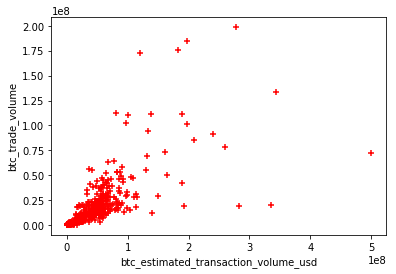

In [27]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('btc_trade_volume')
    plt.xlabel(xlabel)
        
plot_data(new_df['btc_estimated_transaction_volume_usd'], new_df['btc_trade_volume'],'btc_estimated_transaction_volume_usd')

In [35]:
from sklearn import linear_model

model = linear_model.LinearRegression()
x     = new_df[['btc_estimated_transaction_volume_usd']]
y     = new_df['btc_trade_volume']

In [36]:
# train data using linear regression 
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# Model Score
model.score(x, y)

0.6105508384251384

In [38]:
# Fill Missing Data Using linear model prediction 
# and Assign it to new column
x = df1[['btc_estimated_transaction_volume_usd']]
btc_trade_volume_predict = model.predict(x) 
df1['btc_trade_volume_predict'] = btc_trade_volume_predict.astype('int64')
df1[df1['btc_trade_volume'].isnull()].head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,btc_trade_volume_predict
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-20,17.3500,6605900.0,1.146124e+08,NaN,148.0,0.020049,0.0,63.0,0.000000,10.113725,...,17.877669,23113.0,11278.0,804159.0,11278.0,8032.0,5.015070e+06,836861.0,14519535.0,5686034
2011-06-22,15.0500,6630950.0,9.979580e+07,NaN,155.0,0.016320,0.0,71.0,0.000000,11.770284,...,17.225305,24881.0,11810.0,825121.0,11810.0,7789.0,3.232504e+06,122507.0,1843731.0,1096722
2011-06-24,16.7501,6654850.0,1.114694e+08,NaN,163.0,0.017697,0.0,57.0,0.000000,16.454405,...,18.075485,22763.0,11134.0,846767.0,11134.0,7349.0,4.528661e+06,106146.0,1777963.0,1072911
2013-09-17,127.5600,11713200.0,1.494136e+09,NaN,10414.0,0.174924,0.0,255.0,7.300000,990.986807,...,8.687958,61057.0,66291.0,23955832.0,42021.0,25426.0,6.727934e+05,137920.0,17593089.0,6798823
2013-09-19,124.1000,11721850.0,1.454682e+09,NaN,10468.0,0.133412,0.0,316.0,6.116667,1091.765127,...,10.486791,66398.0,59004.0,24079219.0,41152.0,27719.0,7.850827e+05,219847.0,27283020.0,10307091


In [39]:
# Get the statistical information
df1.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,btc_trade_volume_predict
count,1584.000000,1.584000e+03,1.584000e+03,1.106000e+03,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1.584000e+03,...,1584.000000,1584.000000,1584.000000,1.584000e+03,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03
mean,334.095935,9.858289e+06,5.045619e+09,7.163810e+06,25575.157921,0.275350,0.332702,524.398118,6.325609,5.922701e+05,...,9.991641,146279.104167,79702.557449,4.995044e+07,73023.962121,48678.102273,1.341287e+06,1.754802e+05,8.198947e+07,3.011372e+07
std,609.052564,5.170361e+06,9.932860e+09,1.825481e+07,35584.788312,0.323961,0.803367,624.657294,5.235022,1.311404e+06,...,12.749557,175945.983749,93616.287421,6.764581e+07,93160.749994,62017.952608,2.349160e+06,2.430975e+05,1.749650e+08,6.334658e+07
min,0.000000,5.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.291940e+05
25%,0.897500,5.609512e+06,4.942691e+06,0.000000e+00,10.000000,0.004050,0.000000,12.000000,0.000000,4.656278e-01,...,2.015895,2829.000000,2046.750000,3.124270e+05,2046.750000,1539.500000,1.733491e+05,5.297075e+04,4.475075e+04,4.453960e+05
50%,97.235000,1.111709e+07,1.105880e+09,2.695221e+05,7364.000000,0.133423,0.000000,287.500000,7.400000,7.760397e+01,...,6.592404,53019.000000,49466.000000,1.725231e+07,24052.500000,22898.000000,8.295208e+05,1.493515e+05,1.516898e+07,5.921168e+06
75%,446.337500,1.435121e+07,6.437710e+09,6.763820e+06,38520.750000,0.446481,0.000000,792.000000,9.316667,3.738849e+05,...,10.758279,237152.500000,115646.250000,7.468435e+07,108932.750000,61813.500000,1.801741e+06,2.449880e+05,8.279745e+07,3.040625e+07
max,4748.255000,1.654439e+07,7.851738e+10,1.984916e+08,131365.560971,0.998177,5.000000,2235.977273,47.733333,8.215055e+06,...,90.202095,687290.000000,367710.000000,2.520994e+08,354151.000000,256495.000000,4.599222e+07,5.313161e+06,1.422580e+09,5.154784e+08


#### 4. Data Visualization

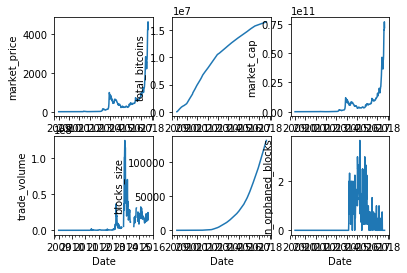

In [46]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('market_price')
df1.btc_market_price.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('total_bitcoins')
df1.btc_total_bitcoins.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('market_cap')
df1.btc_market_cap.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('trade_volume')
df1.btc_trade_volume.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('blocks_size')
df1.btc_blocks_size.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('n_orphaned_blocks')
df1['btc_n_orphaned_blocks'].resample('W').mean().plot()